In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
# give columns name
df = pd.read_csv('smoking.csv')
print(df.shape)
df.head()

(55692, 27)


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
# Dorp the columns with miss data
df.replace('?',np.nan, inplace=True)
df = df.dropna()
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
df = df.replace({'gender': {'F': 0, 'M': 1}})
df = df.replace({'oral': {'Y': 1, 'N': 0}})
df = df.replace({'tartar': {'Y': 1, 'N': 0}})
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1,0
1,1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1,0
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0,1
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1,0
4,4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0,0


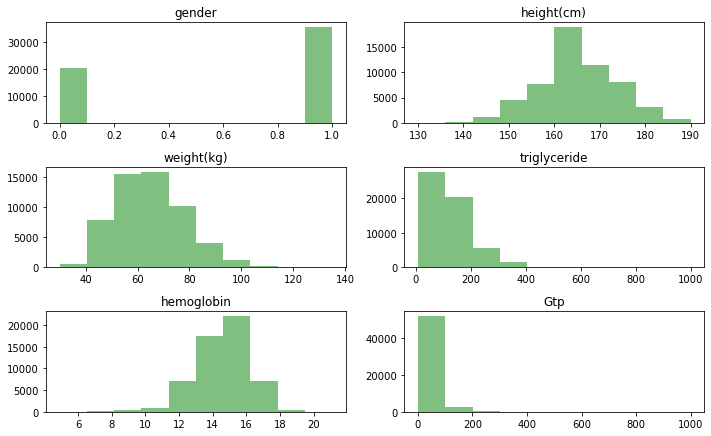

In [5]:
# num_list = list(df.columns)
num_list = ['gender', 'height(cm)', 'weight(kg)',
       'triglyceride', 'hemoglobin', 'Gtp']
fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]],color='green',alpha=0.5)

plt.tight_layout()

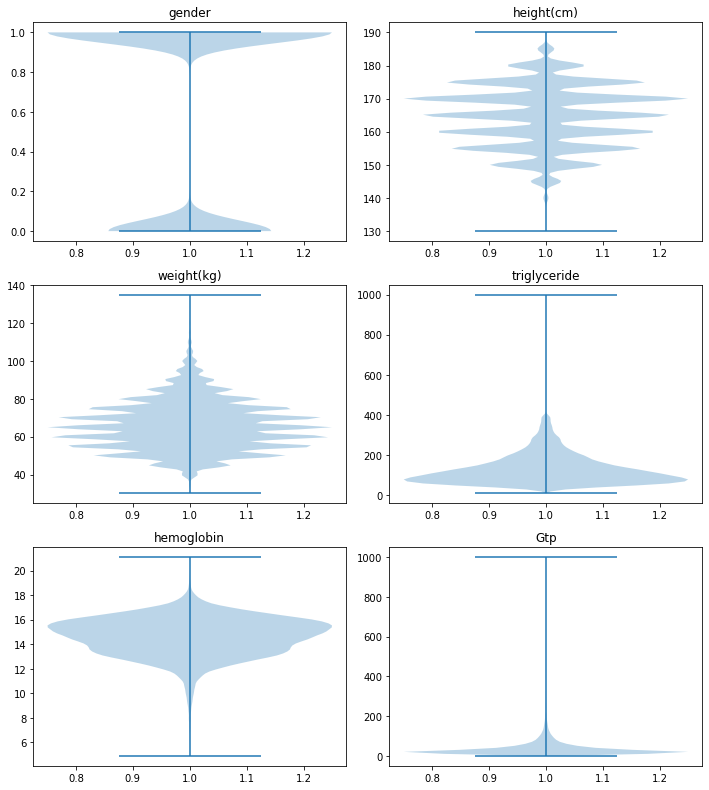

In [6]:
num_list4=['gender', 'height(cm)', 'weight(kg)',
       'triglyceride', 'hemoglobin', 'Gtp']
fig = plt.figure(figsize=(10,40))

for i in range(len(num_list4)):
    plt.subplot(11,2,i+1)
    plt.title(num_list4[i])
    plt.violinplot(df[num_list4[i]])

plt.tight_layout()

In [7]:
# sns.pairplot(df.iloc[:,1:27], hue='smoking')
#sns.pairplot(df,hue='smoking',vars=['gender', 'systolic', 'relaxation', 'height(cm)', 'weight(kg)', 'waist(cm)',
#       'triglyceride', 'hemoglobin', 'serum creatinine', 'Gtp'])

In [8]:
# Get the correlation of the columns
df.corr()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
ID,1.000000,0.008657,-0.000825,0.006306,0.004814,0.005384,0.009616,0.003088,0.002676,-0.004959,...,0.006464,0.000382,0.003830,-0.001865,-0.002803,0.000823,NaN,0.000641,0.002474,0.011476
gender,0.008657,1.000000,-0.290095,0.741556,0.574956,0.419568,0.127424,0.125680,-0.009407,-0.011579,...,0.702214,0.015907,0.507249,0.095718,0.167903,0.237270,NaN,0.084408,0.055473,0.510340
age,-0.000825,-0.290095,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,...,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,NaN,-0.114984,-0.081796,-0.162557
height(cm),0.006306,0.741556,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,...,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,NaN,0.079331,0.055513,0.396675
weight(kg),0.004814,0.574956,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,...,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,NaN,0.073536,0.059921,0.302780
waist(cm),0.005384,0.419568,-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,...,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,NaN,0.044203,0.046197,0.226259
eyesight(left),0.009616,0.127424,-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,...,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,NaN,0.003684,0.012532,0.061204
eyesight(right),0.003088,0.125680,-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,...,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,NaN,0.016359,0.006568,0.063017
hearing(left),0.002676,-0.009407,0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,...,-0.026116,0.014527,0.003349,0.018074,0.004820,0.012864,NaN,-0.016100,-0.035396,-0.023209
hearing(right),-0.004959,-0.011579,0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,...,-0.030943,0.019461,0.008060,0.009393,-0.005081,0.009245,NaN,-0.016376,-0.026698,-0.018855


In [9]:
df = df.drop('ID',axis=1)
df = df.drop('age',axis=1)
df = df.drop('oral',axis=1)
df = df.drop('eyesight(left)',axis=1)
df = df.drop('eyesight(right)',axis=1)
df = df.drop('hearing(left)',axis=1)
df = df.drop('hearing(right)',axis=1)
df = df.drop('LDL',axis=1)
df = df.drop('Urine protein',axis=1)
df = df.drop('HDL',axis=1)
df = df.drop('Cholesterol',axis=1)
df = df.drop('AST',axis=1)
df = df.drop('waist(cm)',axis=1)
df = df.drop('fasting blood sugar',axis=1)
df = df.drop('serum creatinine',axis=1)
df = df.drop('ALT',axis=1)
df = df.drop('dental caries',axis=1)
df = df.drop('tartar',axis=1)

<AxesSubplot:>

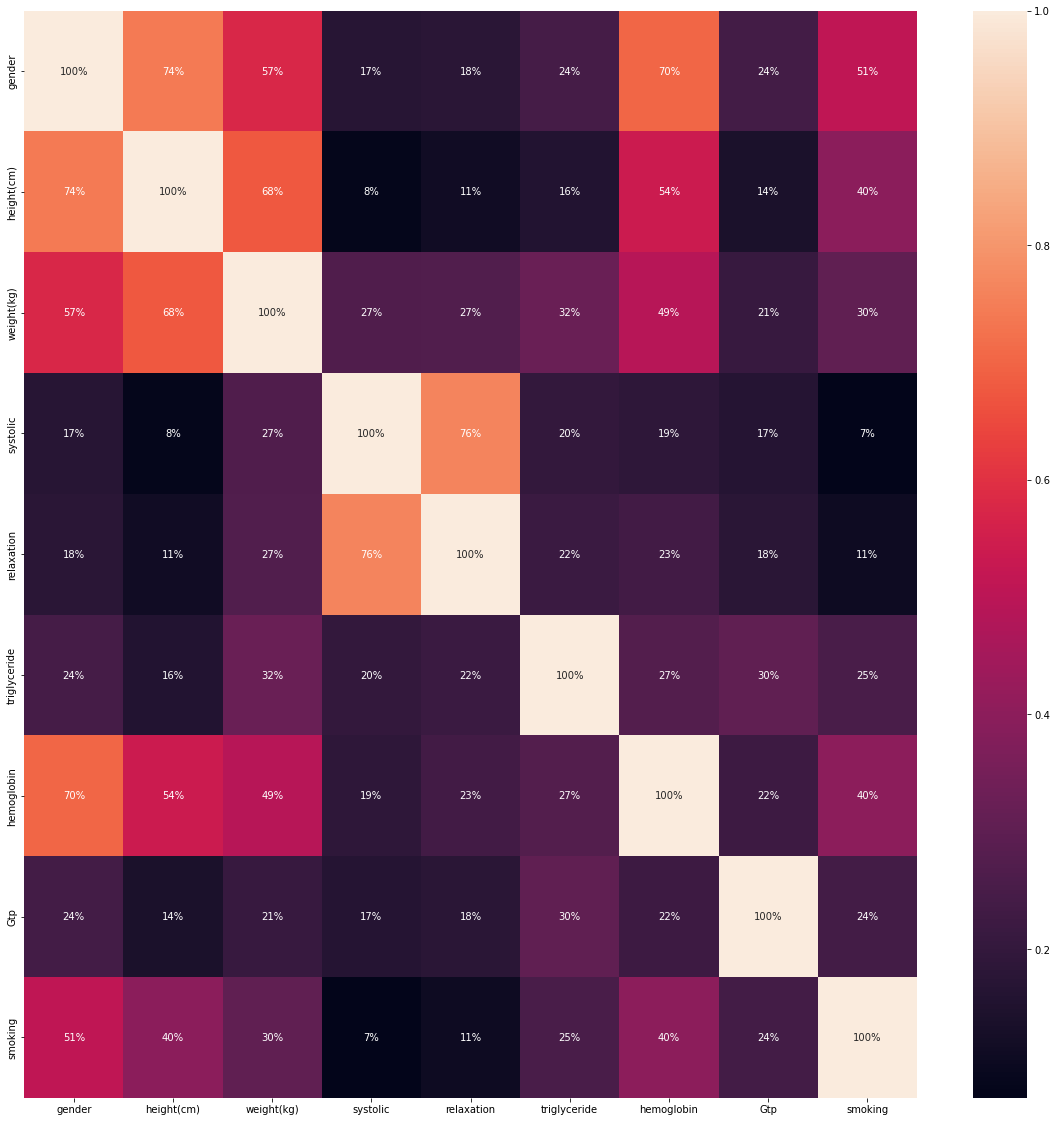

In [10]:
# Visualization the correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [11]:
df.corr()

,gender,height(cm),weight(kg),systolic,relaxation,triglyceride,hemoglobin,Gtp,smoking
gender,1.000000,0.741556,0.574956,0.167289,0.177891,0.241520,0.702214,0.237270,0.510340
height(cm),0.741556,1.000000,0.675656,0.080585,0.113193,0.156693,0.539367,0.139720,0.396675
weight(kg),0.574956,0.675656,1.000000,0.266131,0.271634,0.324429,0.492970,0.209625,0.302780
systolic,0.167289,0.080585,0.266131,1.000000,0.761051,0.198826,0.186514,0.165724,0.073109
relaxation,0.177891,0.113193,0.271634,0.761051,1.000000,0.215541,0.232899,0.177648,0.108309
triglyceride,0.241520,0.156693,0.324429,0.198826,0.215541,1.000000,0.273353,0.301876,0.251799
hemoglobin,0.702214,0.539367,0.492970,0.186514,0.232899,0.273353,1.000000,0.223844,0.400678
Gtp,0.237270,0.139720,0.209625,0.165724,0.177648,0.301876,0.223844,1.000000,0.236619
smoking,0.510340,0.396675,0.302780,0.073109,0.108309,0.251799,0.400678,0.236619,1.000000


In [12]:
df.describe()

,gender,height(cm),weight(kg),systolic,relaxation,triglyceride,hemoglobin,Gtp,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,0.635657,164.649321,65.864936,121.494218,76.004830,126.665697,14.622592,39.952201,0.367288
std,0.481250,9.194597,12.820306,13.675989,9.679278,71.639817,1.564498,50.290539,0.482070
min,0.000000,130.000000,30.000000,71.000000,40.000000,8.000000,4.900000,1.000000,0.000000
25%,0.000000,160.000000,55.000000,112.000000,70.000000,74.000000,13.600000,17.000000,0.000000
50%,1.000000,165.000000,65.000000,120.000000,76.000000,108.000000,14.800000,25.000000,0.000000
75%,1.000000,170.000000,75.000000,130.000000,82.000000,160.000000,15.800000,43.000000,1.000000
max,1.000000,190.000000,135.000000,240.000000,146.000000,999.000000,21.100000,999.000000,1.000000


C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gender')

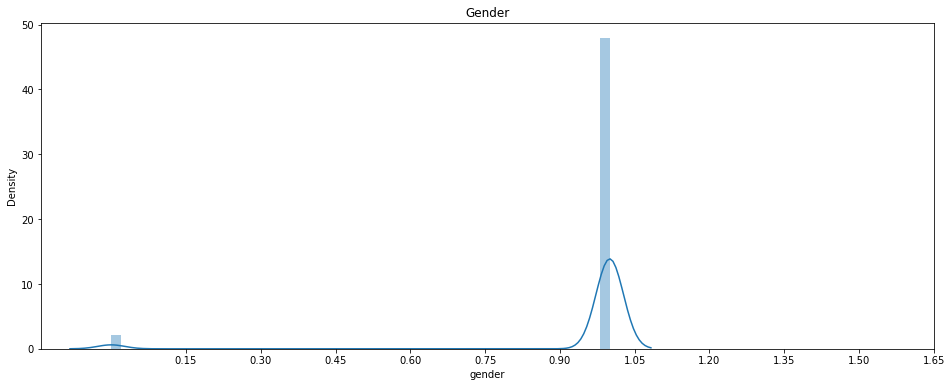

In [13]:
#Gender for smoking
fig = plt.figure(figsize = (16,6))

sns.distplot(df["gender"][df["smoking"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Gender")

C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Height')

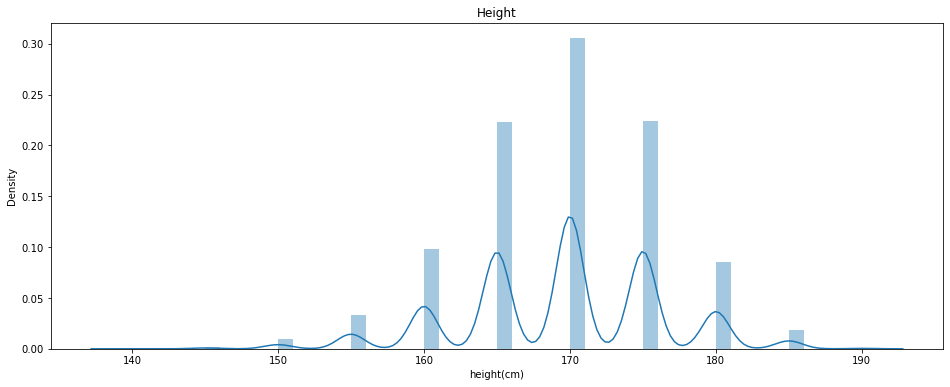

In [14]:
#Height for smoking
fig = plt.figure(figsize = (16,6))

sns.distplot(df["height(cm)"][df["smoking"] == 1])
plt.xticks()
plt.title("Height")

C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight')

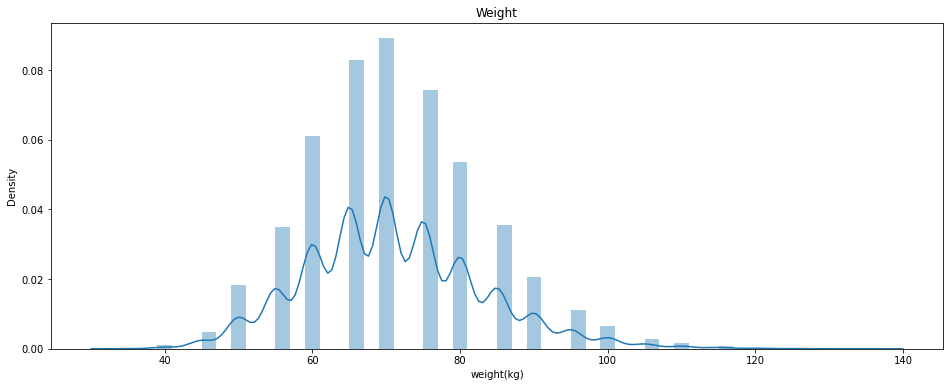

In [15]:
#Weight for smoking
fig = plt.figure(figsize = (16,6))

sns.distplot(df["weight(kg)"][df["smoking"] == 1])
plt.xticks()
plt.title("Weight")

C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Triglyceride')

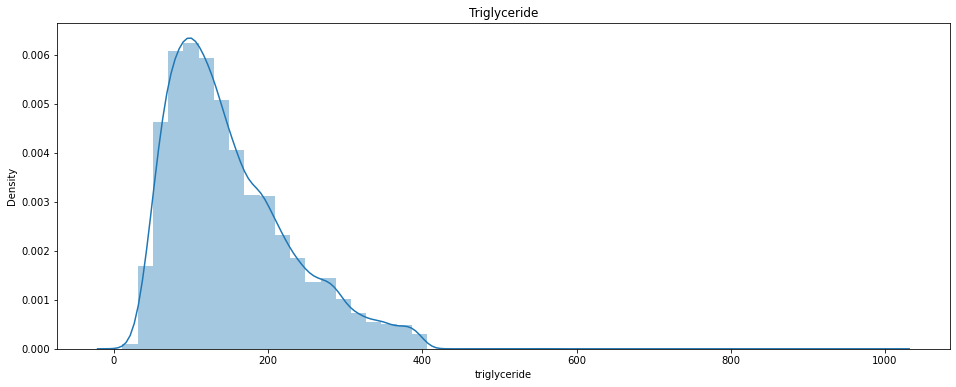

In [16]:
#Triglyceride for smoking
fig = plt.figure(figsize = (16,6))

sns.distplot(df["triglyceride"][df["smoking"] == 1])
plt.xticks()
plt.title("Triglyceride")

C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Hemoglobin')

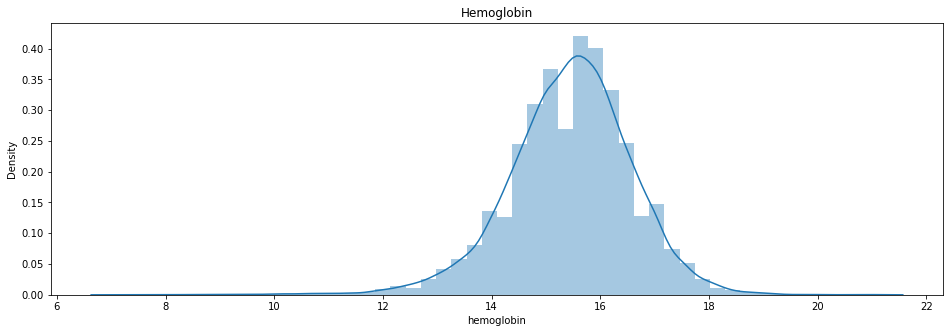

In [17]:
#Hemoglobin for smoking
fig = plt.figure(figsize = (16,5))

sns.distplot(df["hemoglobin"][df["smoking"] == 1])
plt.xticks()
plt.title("Hemoglobin")

C:\Users\Asif\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gtp')

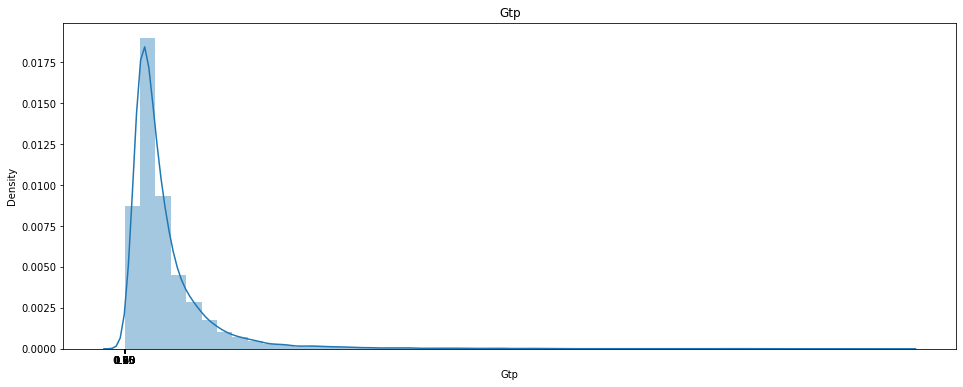

In [18]:
#Gtp for smoking
fig = plt.figure(figsize = (16,6))

sns.distplot(df["Gtp"][df["smoking"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("Gtp")

In [19]:
# split the data set into independent (X) and dependent (Y) data set
X = df.drop(["systolic","relaxation","smoking"], axis =1)
Y = df.iloc[:,-1]

In [20]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [21]:
# Scale the data (Feature Scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.fit_transform(X_test)
# print(X_train)

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))

Logistic Regression Training Accuracy: 0.731453929817361


In [23]:
#  test model accuracy on test on confusion matrix
from sklearn.metrics import confusion_matrix
log_y_pred =log.predict(X_test)
cm = confusion_matrix(Y_test,log_y_pred)

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Testing Accuracy = ', (TP + TN)/(TP+TN+FN+FP))


[[8035 2609]
 [1767 4297]]
Testing Accuracy =  0.7380895379458942


In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
tree.fit(X_train, Y_train)
print('Decision Tree Training Accuracy:', tree.score(X_train, Y_train))

Decision Tree Training Accuracy: 0.9995895752103428


In [25]:

tree_y_pred =tree.predict(X_test)
cm = confusion_matrix(Y_test,tree_y_pred)

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Testing Accuracy = ', (TP + TN)/(TP+TN+FN+FP))

[[8616 2028]
 [1999 4065]]
Testing Accuracy =  0.7589777352166627


In [26]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state=0)
forest.fit(X_train, Y_train)
# Print the models accuracy on the training data
print('Random Forest Training Accuracy:', forest.score(X_train, Y_train))

Random Forest Training Accuracy: 0.9882002872973528


In [27]:
forest_y_pred =forest.predict(X_test)
cm = confusion_matrix(Y_test,forest_y_pred)

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Testing Accuracy = ', (TP + TN)/(TP+TN+FN+FP))

[[9082 1562]
 [2016 4048]]
Testing Accuracy =  0.7858510892985396


In [28]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train, Y_train)
# Print the models accuracy on the training data
print('Support vector machine:', svc.score(X_train, Y_train))


Support vector machine: 0.7404319720911143


In [29]:
svc_y_pred = svc.predict(X_test)
cm = confusion_matrix(Y_test,svc_y_pred)

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Testing Accuracy = ', (TP + TN)/(TP+TN+FN+FP))

[[7928 2716]
 [1588 4476]]
Testing Accuracy =  0.7423988508498923


In [30]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Naive Bayes Training Accuracy:', gnb.score(X_train, Y_train))
gnb_y_pred = gnb.predict(X_test)
cm = confusion_matrix(Y_test,gnb_y_pred)

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Testing Accuracy = ', (TP + TN)/(TP+TN+FN+FP))

Naive Bayes Training Accuracy: 0.7065206238456803
[[6569 4075]
 [ 812 5252]]
Testing Accuracy =  0.70750538664113


In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print('Logistic Regression Model ')
print (classification_report(Y_test,log.predict(X_test)))
print('Accuracy:',accuracy_score(Y_test,log.predict(X_test)))
print()

print('Decision Tree Model ')
print (classification_report(Y_test,tree.predict(X_test)))
print('Accuracy:',accuracy_score(Y_test,tree.predict(X_test)))
print()

print('Random Forest Model ')
print (classification_report(Y_test,forest.predict(X_test)))
print('Accuracy:', accuracy_score(Y_test,forest.predict(X_test)))
print()

print('Support vector machine ')
print (classification_report(Y_test,svc.predict(X_test)))
print('Accuracy:', accuracy_score(Y_test,svc.predict(X_test)))
print()

Logistic Regression Model 
              precision    recall  f1-score   support

           0       0.82      0.75      0.79     10644
           1       0.62      0.71      0.66      6064

    accuracy                           0.74     16708
   macro avg       0.72      0.73      0.72     16708
weighted avg       0.75      0.74      0.74     16708

Accuracy: 0.7380895379458942

Decision Tree Model 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     10644
           1       0.67      0.67      0.67      6064

    accuracy                           0.76     16708
   macro avg       0.74      0.74      0.74     16708
weighted avg       0.76      0.76      0.76     16708

Accuracy: 0.7589777352166627

Random Forest Model 
              precision    recall  f1-score   support

           0       0.82      0.85      0.84     10644
           1       0.72      0.67      0.69      6064

    accuracy                           0.79     16708

In [32]:
import pickle
pickle.dump(forest, open('classifier.pkl', 'wb'))

In [33]:
pickle.dump(sc, open('sc.pkl', 'wb'))